In [ ]:
!pip install Sastrawi

     |████████████████████████████████| 209 kB 41.9 MB/s 


In [ ]:
import tweepy
from tweepy import OAuthHandler
import pandas as pd
import re
import csv
import nltk
nltk.download('stopwords')
nltk.download('punkt')
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
consumer_key = 'CFzjwoETY9oP4Fe************'
consumer_secret = 'UU1RZ6EtwJkFqP7t9iizcCW3tMAevkEZu******************'
access_token = '996401553706643457-ekraLsZLiEWCUGE92P1D************'
access_token_secret = '1YWwU5kdfqZCPIXX02YVfDNnC1zwmmUK************'

In [ ]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

In [ ]:
#csvFile = open('data_tweet.csv', 'a')
#csvWriter = csv.writer(csvFile)

In [ ]:
#for tweet in tweepy.Cursor(api.search,q="kim seon ho",count=3000,
 #                          lang="id",
  #                         since="2021-10-26").items():
   # print (tweet.created_at, tweet.text)
    #csvWriter.writerow([tweet.created_at, tweet.text.encode('utf-8').decode("utf-8")])
#csvFile.close()

In [ ]:
search_words= 'kim seon ho'
new_search = search_words + " -filter:retweets"
new_search

'kim seon ho -filter:retweets'

In [ ]:
tweets = tweepy.Cursor(api.search,
                       q=new_search, count=3000,
                       lang="id",
                       since="2021-10-26").items()

a=[tweet.text for tweet in tweets]
a

['Kim Seon Ho di Edition Sensibility menampilkan contoh ketampanan yang paripurna🙂\U0001f972',
 'Kim Seon Ho harus banyak belajar dari Hyungnya bagaimana memilih pasangan. Masih kesel wkwkwkkwkw https://t.co/cnVKZhwWFa',
 '@intajinda Kim Seon Ho!!! 💙💙💙🥰🥰🥰',
 'Raih 530 Ribu Lebih Suara, Kim Seon Ho Duduki Posisi Teratas Popularity Award AAA 2021 #Kimseonho #KimSeonHoeffect https://t.co/w85NPyAcJA',
 'Friday morning haha, waahhh nau dah up kim seon ho lagii !! Hotteok couple comeback nich 😆, satu-satu iklannya bali… https://t.co/HY4FscxNnZ',
 'Kepikiran deh kim seon ho stelah kena skandal dia bner2 kehilangan semuanya termasuk temen dan penghasilan\nGarem pu… https://t.co/4qEP6oOaKx',
 'Udh ngoceh2 ngamuk sama cewek gatel, gataunya modelan mantan pacar kim seon ho:(',
 'My Pulici ❤️\nKi Do Hun                       Kim Seon Ho \nJung IL Woo                 Yoon Shi Yoon… https://t.co/sIf7uD15me',
 'kim seon ho!!!!!\nhttps://t.co/JaPFYmnlV5',
 'Fans Layangkan Petisi, Produser 2 Days &amp;

In [ ]:
df= pd.DataFrame(a)
df.columns= ['tweet']
df.head()

,tweet
0,Kim Seon Ho di Edition Sensibility menampilkan...
1,Kim Seon Ho harus banyak belajar dari Hyungnya...
2,@intajinda Kim Seon Ho!!! 💙💙💙🥰🥰🥰
3,"Raih 530 Ribu Lebih Suara, Kim Seon Ho Duduki ..."
4,"Friday morning haha, waahhh nau dah up kim seo..."


In [ ]:
df.shape

(693, 1)

In [ ]:
#df = pd.read_csv("/content/data_tweet.csv")
#df.columns=['tanggal','tweet']

In [ ]:
df.to_csv('data_tweet.csv')

In [ ]:
df['tweet']

0      Kim Seon Ho di Edition Sensibility menampilkan...
1      Kim Seon Ho harus banyak belajar dari Hyungnya...
2                       @intajinda Kim Seon Ho!!! 💙💙💙🥰🥰🥰
3      Raih 530 Ribu Lebih Suara, Kim Seon Ho Duduki ...
4      Friday morning haha, waahhh nau dah up kim seo...
                             ...                        
688    Mana nih si pencinta drama korea? 🙋🏻‍♀️🙋🏻‍♂️ P...
689    Taunya bayi yg di aborsi bukan bayinya kim seo...
690                       @seonhojpeg Kim Seon Ho 💚💚💚🥰🥰🥰
691    Jadwal syuting sempat ditunda dan Kim Seon Ho ...
692    Pesan Kim Seon Ho dalam Buku Naskah Hometown C...
Name: tweet, Length: 693, dtype: object

In [ ]:
# Membuat fungsi untuk membersihkan twit
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # remove mentions
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # remove hashtag
    text = re.sub(r'RT[\s]', '', text) # remove RT
    text = re.sub(r"http\S+", '', text) # remove link
    text = re.sub(r'[0-9]+', '', text) # remove numbers

    text = text.replace('\n', ' ') # replace new line into space
    text = text.translate(str.maketrans('', '', string.punctuation)) # remove all punctuations
    text = text.strip(' ') # remove characters space from both left and right text
    return text
    
def casefoldingText(text): # Converting all the characters in a text into lower case
    text = text.lower() 
    return text

def tokenizingText(text): # Tokenizing or splitting a string, text into a list of tokens
    text = word_tokenize(text) 
    return text

In [ ]:
def filteringText(text): # Remove stopwors in a text
    listStopwords = set(stopwords.words('indonesian'))
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered 
    return text

def stemmingText(text): # Reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    text = [stemmer.stem(word) for word in text]
    return text

def toSentence(list_words): # Convert list of words into sentence
    sentence = ' '.join(word for word in list_words)
    return sentence

In [ ]:
# Preprocessing df data

df['text_clean'] = df['tweet'].apply(cleaningText)
df['text_clean'] = df['text_clean'].apply(casefoldingText)
df.drop(['tweet'], axis = 1, inplace = True)

df['text_preprocessed'] = df['text_clean'].apply(tokenizingText)
df['text_preprocessed'] = df['text_preprocessed'].apply(filteringText)
df['text_preprocessed'] = df['text_preprocessed'].apply(stemmingText)

#drop duplicates/spams df
df.drop_duplicates(subset = 'text_clean', inplace = True)

In [ ]:
# Export to csv file
df.to_csv(r'data_tweet_clean.csv', index = False, header = True,index_label=None)
df

,text_clean,text_preprocessed
0,kim seon ho di edition sensibility menampilkan...,"[kim, seon, ho, edition, sensibility, tampil, ..."
1,kim seon ho harus banyak belajar dari hyungnya...,"[kim, seon, ho, ajar, hyungnya, pilih, pasang,..."
2,kim seon ho 💙💙💙🥰🥰🥰,"[kim, seon, ho, ]"
3,raih ribu lebih suara kim seon ho duduki posi...,"[raih, ribu, suara, kim, seon, ho, duduk, posi..."
4,friday morning haha waahhh nau dah up kim seon...,"[friday, morning, haha, waahhh, nau, dah, up, ..."
...,...,...
687,kim seon ho dipastikan main film sad tropical ...,"[kim, seon, ho, main, film, sad, tropical, kim..."
688,mana nih si pencinta drama korea 🙋🏻‍♀️🙋🏻‍♂️ pa...,"[nih, si, cinta, drama, korea, , lo, gak, asin..."
689,taunya bayi yg di aborsi bukan bayinya kim seo...,"[tau, bayi, yg, aborsi, bayi, kim, seon, ho, g..."
691,jadwal syuting sempat ditunda dan kim seon ho ...,"[jadwal, syuting, tunda, kim, seon, ho, ganti]"


In [ ]:
df.shape

(599, 2)

## Sentiment Polarity

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path_data = '/content/drive/My Drive/PYTHON_CRAWLING/'

In [ ]:
#df=pd.read_csv(path_data+'data_tweet_clean.csv')

In [ ]:
df.head()

,text_clean,text_preprocessed
0,kim seon ho di edition sensibility menampilkan...,"[kim, seon, ho, edition, sensibility, tampil, ..."
1,kim seon ho harus banyak belajar dari hyungnya...,"[kim, seon, ho, ajar, hyungnya, pilih, pasang,..."
2,kim seon ho 💙💙💙🥰🥰🥰,"[kim, seon, ho, ]"
3,raih ribu lebih suara kim seon ho duduki posi...,"[raih, ribu, suara, kim, seon, ho, duduk, posi..."
4,friday morning haha waahhh nau dah up kim seon...,"[friday, morning, haha, waahhh, nau, dah, up, ..."


In [ ]:
# Loads lexicon positive and negative data
lexicon_positive = dict()
with open(path_data+'lexicon_positive.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        lexicon_positive[row[0]] = int(row[1])

In [ ]:
lexicon_negative = dict()
import csv
with open(path_data+'lexicon_negative.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        lexicon_negative[row[0]] = int(row[1])

In [ ]:
# Function to determine sentiment polarity of df        
def sentiment_analysis_lexicon_indonesia(text):
    #for word in text:
    score = 0
    for word in text:
        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
    for word in text:
        if (word in lexicon_negative):
            score = score + lexicon_negative[word]
    polarity=''
    if (score > 0):
        polarity = 'positive'
    elif (score < 0):
        polarity = 'negative'
    else:
        polarity = 'neutral'
    return score, polarity

In [ ]:
# Results from determine sentiment polarity of df

results = df['text_preprocessed'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
df['polarity_score'] = results[0]
df['polarity'] = results[1]
print(df['polarity'].value_counts())

# Export to csv file
df.to_csv(r'data_clean_polarity.csv', index = False, header = True,index_label=None)

df

negative    235
neutral     207
positive    157
Name: polarity, dtype: int64


,text_clean,text_preprocessed,polarity_score,polarity
0,kim seon ho di edition sensibility menampilkan...,"[kim, seon, ho, edition, sensibility, tampil, ...",-1,negative
1,kim seon ho harus banyak belajar dari hyungnya...,"[kim, seon, ho, ajar, hyungnya, pilih, pasang,...",-5,negative
2,kim seon ho 💙💙💙🥰🥰🥰,"[kim, seon, ho, ]",0,neutral
3,raih ribu lebih suara kim seon ho duduki posi...,"[raih, ribu, suara, kim, seon, ho, duduk, posi...",-1,negative
4,friday morning haha waahhh nau dah up kim seon...,"[friday, morning, haha, waahhh, nau, dah, up, ...",-6,negative
...,...,...,...,...
687,kim seon ho dipastikan main film sad tropical ...,"[kim, seon, ho, main, film, sad, tropical, kim...",-4,negative
688,mana nih si pencinta drama korea 🙋🏻‍♀️🙋🏻‍♂️ pa...,"[nih, si, cinta, drama, korea, , lo, gak, asin...",-5,negative
689,taunya bayi yg di aborsi bukan bayinya kim seo...,"[tau, bayi, yg, aborsi, bayi, kim, seon, ho, g...",-9,negative
691,jadwal syuting sempat ditunda dan kim seon ho ...,"[jadwal, syuting, tunda, kim, seon, ho, ganti]",0,neutral


# Analysis and Visualization

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'whitegrid')

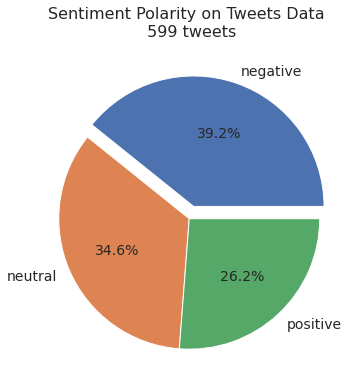

In [ ]:
fig, ax = plt.subplots(figsize = (6, 6))
sizes = [count for count in df['polarity'].value_counts()]
labels = list(df['polarity'].value_counts().index)
explode = (0.1, 0, 0)
ax.pie(x = sizes, labels = labels, autopct = '%1.1f%%', explode = explode, textprops={'fontsize': 14})
ax.set_title(f"Sentiment Polarity on Tweets Data \n {df.shape[0]} tweets", fontsize = 16, pad = 20)
plt.show()


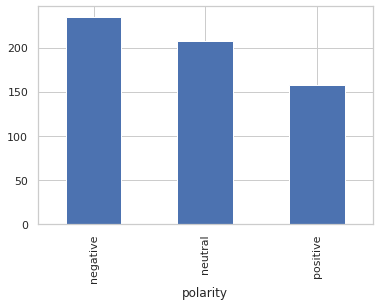

In [ ]:
df.groupby('polarity')['polarity'].count().plot(kind='bar')

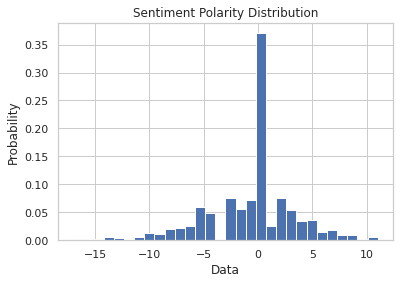

In [ ]:
plt.hist(df['polarity_score'], density=True, bins=30)  # density=False would make counts
plt.title("Sentiment Polarity Distribution")
plt.ylabel('Probability')
plt.xlabel('Data');

In [ ]:
# memfilter berdasarkan review positif
review_positif = df[df["polarity"] == "positive"]

# memfilter berdasarkan review negatif
review_negatif = df[df["polarity"] == "negative"]

# memfilter berdasarkan review neutral
review_neutral = df[df["polarity"] == "neutral"]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


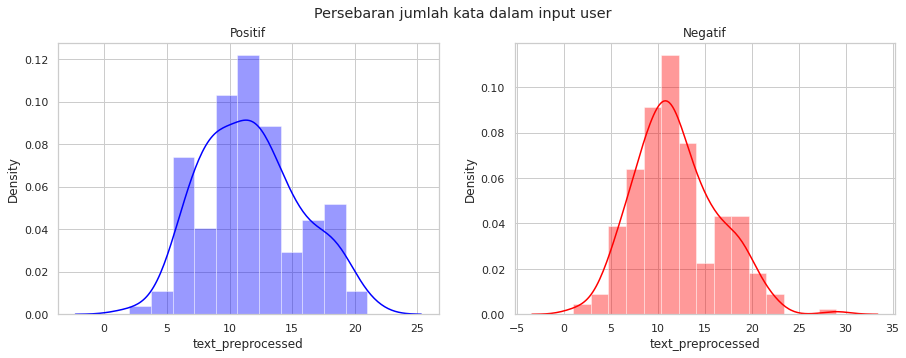

In [ ]:
# memvisualisasikan banyaknya input kata yang digunakan
count_positif_word = review_positif["text_preprocessed"].apply(lambda x: len(x))
count_negatif_word = review_negatif["text_preprocessed"].apply(lambda x: len(x))


fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
sns.distplot(count_positif_word,ax=ax1,color='Blue')
ax1.set_title("Positif")
sns.distplot(count_negatif_word,ax=ax2,color='Red')
ax2.set_title("Negatif")
fig.suptitle("Persebaran jumlah kata dalam input user")
plt.show() 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


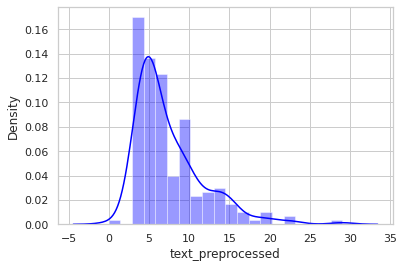

In [ ]:
count_neutral_word = review_neutral['text_preprocessed'].apply(lambda x: len(x))
sns.distplot(count_neutral_word,color='Blue')

# Top 10 Positive and Negative Tweet Sentiments

In [ ]:
pd.set_option('display.max_colwidth', 3000)
positive_tweets = df[df['polarity'] == 'positive']
positive_tweets = positive_tweets[['text_clean', 'polarity_score', 'polarity']].sort_values(by = 'polarity_score', ascending=False).reset_index(drop = True)
positive_tweets.index += 1
positive_tweets[0:10]

,text_clean,polarity_score,polarity
1,bener jujur biasa nonton gratisan cuman karena kim seon ho inih jadi langganan 🤣,11,positive
2,netflix pinter jaga momentum ketika sebuah serial populer usai mereka tambahin ke katalog serial lain yg diperank…,11,positive
3,selamat siang untuk semua istri bapak ksh yang bukan istri kim seon ho ga selamat siang wkwkwk jangan lupa awali…,11,positive
4,siapkan single saranghaeyo tata liem jalani sesi pemotretan kece ala kim seonho tata liem adalah fans berat da…,10,positive
5,di dunia ada masmas yang baik hati sayang pasangan amp keluarga seperti kim seon ho tetapi tidak memiliki wajah rupawan seperti kim seon ho,9,positive
6,selamat malam dan selamat tidur buat seon ho seonhokim,9,positive
7,timeline gue banyak foto cewe cakep like annya si 😂😂😂😂 sekali kali kim seon ho lu retweet buat refresh timeline gue 😂😂,9,positive
8,foto transformasi kim seon ho dari kecil imutimut masa sekolah sebagai bintang teater hingga sukses,9,positive
9,foto transformasi kim seon ho dari kecil imutimut masa sekolah sebagai bintang teater hingga sukses kim seon…,9,positive
10,iklan kim seon ho kembali dipasang sejumlah brand kini penggemar berharap kim seon ho kembali direkrut sebagai me…,8,positive


In [ ]:
pd.set_option('display.max_colwidth', 3000)
negative_tweets = df[df['polarity'] == 'negative']
negative_tweets = negative_tweets[['text_clean', 'polarity_score', 'polarity']].sort_values(by = 'polarity_score', ascending=True).reset_index(drop = True)
negative_tweets.index += 1
negative_tweets[0:10]

,text_clean,polarity_score,polarity
1,gara gara kim seon ho dibilang mirip yoo nabi i decide to watch nevertheless surprisingly sukaak mampus drama itu…,-17,negative
2,kim seon ho nggak cocok main main drama serius cocok nya yang fun dan comedy muka nya nggak bisa a serius,-16,negative
3,gapapa jadi selingkuhan asal selingkuhannya kim seon ho 😭 kalo pas ditembak tbtb kebangun itu gemes sekalii,-15,negative
4,waktu pertama muncul hanya berita dr satu pihak ke diup belom duanya jadi gak ikutan sama kayak ka…,-14,negative
5,kim seonho kembali ke dunia hiburan dalam waktu singkat setelah skandal mantan pacar yang aborsi menimpanya padah…,-14,negative
6,mksdnye yg bikin gundah gulana itu si kim seon ho ya shay krn kan dia abs kena skandal ye jd gw bawaannya jd galau gitu,-14,negative
7,peran apapun nek sek main kim seon ho mesti nangis njir walapun pas dee main neng drama waikiki walaupun lucu ta…,-13,negative
8,alasan istirahat nonton drama korea ongoing masih kesel karena kim seon ho hiatus,-13,negative
9,please keep reminding me kalo kim seon ho umurnya tuh w kebanakan halu dah kayanya tp dia gemes bgt fakkkk kek umur taun🥺🥺🥺🥺🥺,-12,negative
10,kepergiaan kim seon ho dalam acara days night season meninggalkan banyak kesedihan di hati penonton pada …,-11,negative


In [ ]:
# Visualize word cloud

list_words=''
for tweet in df['text_preprocessed']:
    for word in tweet:
        list_words += ' '+(word)
        

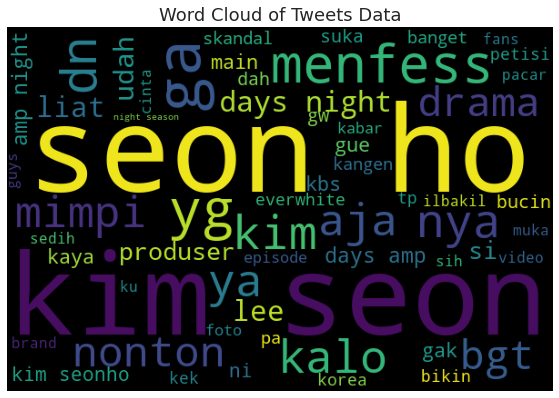

In [ ]:
wordcloud = WordCloud(width = 600, height = 400, background_color = 'black', min_font_size = 10).generate(list_words)
fig, ax = plt.subplots(figsize = (8, 6))
ax.set_title('Word Cloud of Tweets Data', fontsize = 18)
ax.grid(False)
ax.imshow((wordcloud))
fig.tight_layout(pad=0)
ax.axis('off')
plt.show()

In [ ]:
# Berikut proses membuat function untuk wordcloud
from wordcloud import WordCloud, STOPWORDS
def display_word(data, color):
  plt.subplots(figsize=(15,15))
  word_cloud = WordCloud(width = 500, height = 300, background_color="white", contour_color=color,
                         max_words=2000, random_state=42, collocations=False, stopwords = STOPWORDS)
  word_cloud.generate(' '.join(data))
  plt.imshow(word_cloud)
  plt.axis('off')
  plt.show()

In [ ]:
# wordcloud review positif
#display_word(df['text_preprocessed'],'blue')

# Wordcloud tweet Positive

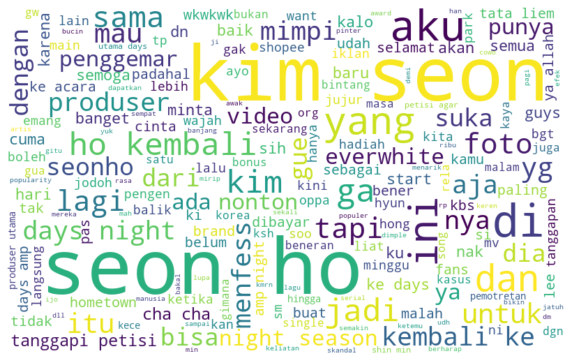

In [ ]:
positivewords=''
for tweet in df['text_preprocessed'][df['polarity'] == 'positive']:
    for word in tweet:
        list_words += ' '+(word)
positiveWords = ' '.join([text for text in df['text_clean'][df['polarity'] == 'positive']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110,background_color="white").generate(positiveWords)
plt.figure(figsize=(10, 10)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

## Wordcloud negative

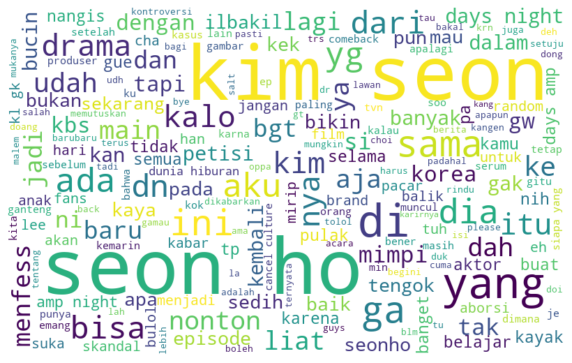

In [ ]:
negativewords=''
for tweet in df['text_preprocessed'][df['polarity'] == 'negative']:
    for word in tweet:
        list_words += ' '+(word)
negativeWords = ' '.join([text for text in df['text_clean'][df['polarity'] == 'negative']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110,background_color="white").generate(negativeWords)
plt.figure(figsize=(10, 10)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

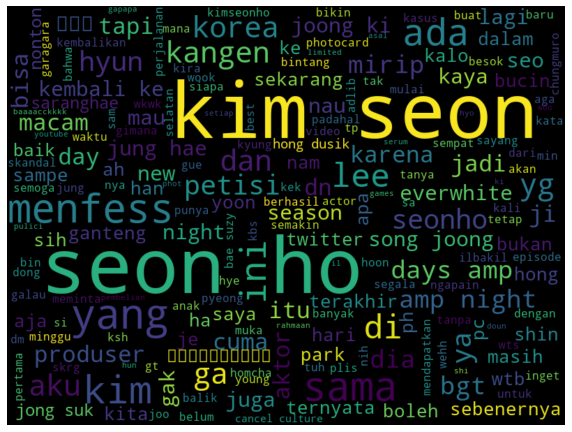

In [ ]:
neutralwords=''
for tweet in df['text_preprocessed'][df['polarity'] == 'neutral']:
    for word in tweet:
        list_words += ' '+(word)
neutralWords = ' '.join([text for text in df['text_clean'][df['polarity'] == 'neutral']])
wordcloud = WordCloud(width=800, height=600, random_state=21, max_font_size=110,background_color="black").generate(neutralWords)
plt.figure(figsize=(10, 10)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

In [ ]:
 #Function to group all positive/negative words
def words_with_sentiment(text):
    positive_words=[]
    negative_words=[]
    for word in text:
        score_pos = 0
        score_neg = 0
        if (word in lexicon_positive):
            score_pos = lexicon_positive[word]
        if (word in lexicon_negative):
            score_neg = lexicon_negative[word]
        
        if (score_pos + score_neg > 0):
            positive_words.append(word)
        elif (score_pos + score_neg < 0):
            negative_words.append(word)
            
    return positive_words, negative_words

In [ ]:
sentiment_words = df['text_preprocessed'].apply(words_with_sentiment)
sentiment_words = list(zip(*sentiment_words))
positive_words = sentiment_words[0]
negative_words = sentiment_words[1]

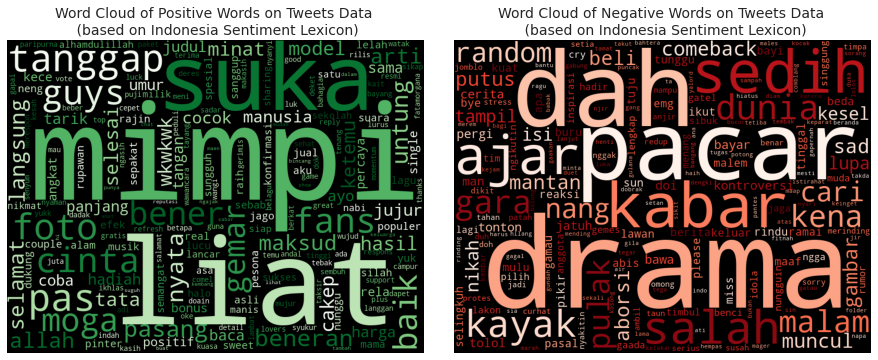

In [ ]:
fig, ax = plt.subplots(1, 2,figsize = (12, 10))
list_words_positive=''
for row_word in positive_words:
    for word in row_word:
        list_words_positive += ' '+(word)
wordcloud_positive = WordCloud(width = 800, height = 600, background_color = 'black', colormap = 'Greens'
                               , min_font_size = 10).generate(list_words_positive)
ax[0].set_title('Word Cloud of Positive Words on Tweets Data \n (based on Indonesia Sentiment Lexicon)', fontsize = 14)
ax[0].grid(False)
ax[0].imshow((wordcloud_positive))
fig.tight_layout(pad=0)
ax[0].axis('off')

list_words_negative=''
for row_word in negative_words:
    for word in row_word:
        list_words_negative += ' '+(word)
wordcloud_negative = WordCloud(width = 800, height = 600, background_color = 'black', colormap = 'Reds'
                               , min_font_size = 10).generate(list_words_negative)
ax[1].set_title('Word Cloud of Negative Words on Tweets Data \n (based on Indonesia Sentiment Lexicon)', fontsize = 14)
ax[1].grid(False)
ax[1].imshow((wordcloud_negative))
fig.tight_layout(pad=0)
ax[1].axis('off')

plt.show()